In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
smoothen_results = pd.read_csv('../intermediate_results/smoothen_results_basenji.csv')

In [3]:
smoothen_results

,Unnamed: 0,raw bin size,smooth bin size,mse,js_per_seq,js_conc,poiss,pr_corr,sp_corr
0,0,1.0,1.0,0.700204,0.333073,0.366932,0.808290,0.576753,0.473844
1,0,1.0,32.0,0.681672,0.083806,0.126571,0.130059,0.582241,0.481771
2,0,1.0,64.0,0.660239,0.081216,0.124645,0.130146,0.586442,0.487214
3,0,1.0,128.0,0.609257,0.075657,0.120537,0.130967,0.594399,0.497320
4,0,1.0,256.0,0.508498,0.064762,0.112808,0.133759,0.607605,0.515620
5,0,1.0,512.0,0.387116,0.050808,0.103163,0.139274,0.619913,0.536297
6,0,1.0,1024.0,0.271726,0.036119,0.092599,0.147411,0.624910,0.549940
7,0,1.0,2048.0,0.175884,NaN,0.080853,0.156426,0.619849,0.555834
8,0,32.0,32.0,0.671617,0.319806,0.358716,0.807245,0.584464,0.481458
9,0,32.0,64.0,0.636158,0.079584,0.123234,0.129302,0.593798,0.491004


In [4]:
metric_label = {'pr_corr':'Pearson r'}
metric = list(metric_label.keys())[0]
label = metric_label[metric]

In [5]:
padded_values = []
bin_sizes = [1, 32, 64, 128, 256, 512, 1024, 2048]

for train_bin, df in smoothen_results.groupby('raw bin size'):
    pr_values = list(df[metric].values)
    add_N = len(bin_sizes)-len(pr_values)
    if add_N>0:
        pr_values = [np.nan for n in range(add_N)]+pr_values
    padded_values.append(pr_values)

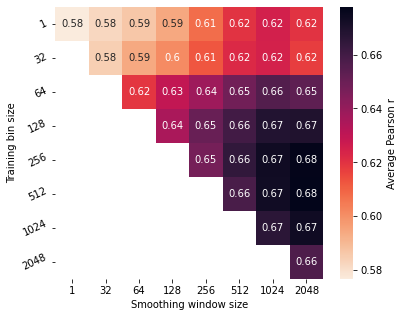

In [8]:
fig, ax = plt.subplots(figsize=[6, 5])
 
# creating mask
mask = np.triu(np.ones_like(padded_values), 1).T
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(padded_values, cmap="rocket_r", annot=True, mask=mask, 
                       cbar_kws={'label': "Average "+label}, ax=ax)
dataplot.set_xticks([r+0.5 for r in range(len(bin_sizes))]) 
dataplot.set_yticks([r+0.5 for r in range(len(bin_sizes))]) 
dataplot.set_xticklabels(bin_sizes) 
dataplot.set_yticklabels(bin_sizes, rotation=25) 
dataplot.set_xlabel('Smoothing window size')
dataplot.set_ylabel('Training bin size')
plt.savefig('../smoothen_triangle_plot.pdf')